# The Potential Arbitrage of Ticker Confusion

In [2]:
from scripts.pairgeneration import pairgeneration as pair
from scripts.returnsintegration import add_stock_info as integrate
from scripts.correlationtesting import calculate_correlations
from scripts.correlationplotting import kde_plots

### Background

In 2001, Michael Rashes published an article in the Journal of Finance that identified a potential arbitrage opportunity in the stock market. He identified two stocks, Massmutual Corporate Investors (MCI) and MCI Communications (MCIC) that had very similar trading patterns, despite being in completely unrelated fields. Rashes' claim was that this similarity was caused by investors incorrectly investing in the smaller stock, MCI, thinking they were investing in the much larger MCIC. The purpose of this project is to investigate the persistence of this issue across the entire stock market.

We will start by identifying all pairs of tickers that could be confused in a manner similar to that of MCI/MCIC; that is, pairs where one ticker is formed by adding a single character to another.

Another important facet of Rashes' results was that the two stocks had no reason to be correlated. To recreate this feature, we will use the Standard Industrial Classification (SIC) system to remove ticker pairs that belong to the same major group.

An extensive, but not necessarily comprehensive, list of tickers and their associated SIC codes is provided in `data\tickers.csv`. A list of the different SIC major groups was downloaded from [this site](https://siccode.com/page/structure-of-sic-codes) and is stored as `data\sic_table.csv`.

In [3]:
TICKER_LIST = "data\\tickers.csv"
SIC_TABLE = "data\\sic_table.csv"

ticker_pairs = pair(TICKER_LIST, SIC_TABLE)
ticker_pairs

,T1,T2
0,SABC,SABB
1,FIGIA,FIGI
2,JJSF,JJSC
3,DLS,DLW
4,FSVB,FSVC
...,...,...
6476,BXS,BXG
6477,BIS,BIR
6478,MILK,MILT
6479,CBH,CBU


Now that we have identified all of the pairs we want to investigate, we need to bring in the daily returns for all of the pairs. The returns data that I have access to is both to large to store on GitHub and from a proprietary source, so **you must supply your own stock return data for the Notebook to run**. I plan to change this in the future.

In [4]:
DAILY_RETURNS = 'data\\daily_ticker_data.csv'
MONTHLY_RETURNS = 'data\\monthly_ticker_data.csv'

INCLUDE_DAILY = False
INCLUDE_MONTHLY = True

In addition to individual stock return data, we might find it useful to incorporate more general return data into our analysis. This script will use the `yfinance` package to download returns from the NYSE, S&P 500, and Bond Indices.

In [5]:
%run scripts/downloadreturns.py

NYSE_RETURNS = "data\\nyse_monthly_returns.csv"

[*********************100%***********************]  1 of 1 completed
C:\Users\jojoh\OneDrive\Documents\Professional\Resume Repositories\MCI-MCIC\MCI-MCIC\scripts\downloadreturns.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data["Daily Returns"].resample("M").agg(lambda x: (x + 1).prod() - 1)
[*********************100%***********************]  1 of 1 completed
C:\Users\jojoh\OneDrive\Documents\Professional\Resume Repositories\MCI-MCIC\MCI-MCIC\scripts\downloadreturns.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data["Daily Returns"].resample("M").agg(lambda x: (x + 1).prod() - 1)
[*********************100%***********************]  1 of 1 completed
C:\Users\jojoh\OneDrive\Documents\Professional\Resume Repositories\MCI-MCIC\MCI-MCIC\scripts\downloadreturns.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  da

Now that we have all of the return data, we will integrate it with our pairs table.

In [6]:
data = integrate(ticker_pairs, MONTHLY_RETURNS, NYSE_RETURNS)
data.head()

,T1,T2,date,T1_VOL,T1_RET,T2_VOL,T2_RET,NYSE_RET
0,SABC,SABB,1970-01-01 00:00:00.019960531+00:00,52.0,0.000000,558.0,C,NaN
1,SABC,SABB,1970-01-01 00:00:00.019960628+00:00,44.0,0.007207,999.0,0.024390,NaN
2,SABC,SABB,1970-01-01 00:00:00.019960731+00:00,62.0,-0.031532,736.0,-0.014571,NaN
3,SABC,SABB,1970-01-01 00:00:00.019960830+00:00,89.0,0.004651,785.0,0.053528,NaN
4,SABC,SABB,1970-01-01 00:00:00.019960930+00:00,31.0,0.016667,472.0,-0.030023,NaN


Now calculate the correlations of the returns for each pair.

In [7]:
correlations = calculate_correlations(data)

c:\Users\jojoh\OneDrive\Documents\Professional\Resume Repositories\MCI-MCIC\MCI-MCIC\scripts\correlationplotting.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(corr_data["T1 vs T2"], shade=True, label="T1 vs T2")
c:\Users\jojoh\OneDrive\Documents\Professional\Resume Repositories\MCI-MCIC\MCI-MCIC\scripts\correlationplotting.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(corr_data["T1 vs NYSE"], shade=True, label="T1 vs NYSE")
c:\Users\jojoh\OneDrive\Documents\Professional\Resume Repositories\MCI-MCIC\MCI-MCIC\scripts\correlationplotting.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(corr_data["T1 vs NYSE"], shade=True, label="T1 vs NYSE")
c:\

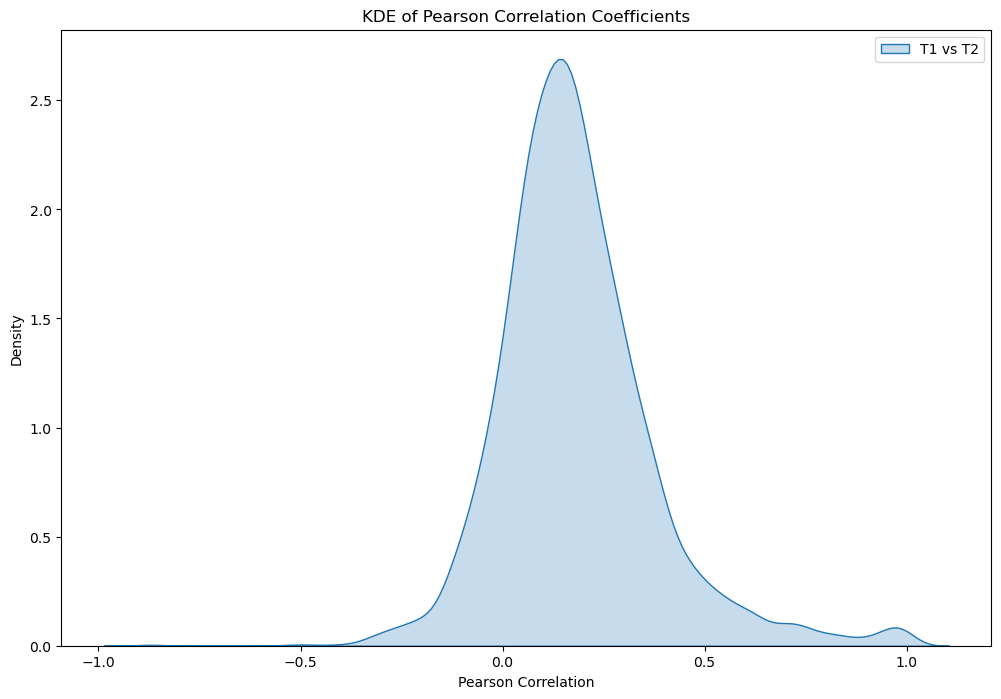

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\results\\correlation_kde.png'

<Figure size 640x480 with 0 Axes>

In [8]:
kde_plots(correlations)

Change gitignore to include tickers, ticker pairs, and sic codes